<h1>PFD - Personalized Fraud Detection</h1>
<h3>With our sub-api banks and payment services could decrease their falsely flagged fraudulent transactions. It uses SEON's API, mathematics, and personal buying history of people.</h3>

<h2>1. Requesting Data from SEON's API</h2>
<p>We don't actually use this data, but in the future an AI or a decision tree could be implemented, that uses SEON's Fraud detection API and our data to calculate a fraud probability score.</p>

In [21]:
from seonapi import fraud_api_request
fraud_api_request("11.22.33.44", "189c1ae6-446d-401e-a642-c1e8ed75daf2")

{'latitude': 39.969,
 'longitude': -83.0114,
 'fraud_score': 10.0,
 'vpn': False,
 'tor': False,
 'proxy': False}

<h2>2. Generating Data</h2>
<p> Because of privacy reasons we need to generate the personas. In a real world application the program would have access to valid personal data, but for this hackathon we didn't have that available to us. For generating the data we imagined a typical week in the lives of our personas (Jeff, the travelling salesman and Zsófi, the Hungarian nurse with a baby). It is as random as possible, but it is imposible to simulate a real person's weekly routine.</p>

In [22]:
from datagen import data_jeff, data_zsofi

<h2>3. Processing of the data</h2>
<p>The math presented here is a proof of concept, that shows it's possible to implement a personalized fraud detection system in the real world based on this data. The main concept is fitting a polynomial on the datapoints. With this much data, computationally we can't give a precise polynom, so we use a polynom with a lower degree. We use python's numpy module to do the approximation for us, then we generate a dataset that measures how much the function differs from the original data. Using the deviation of this dataset we can see whether this data is important. After that we measure the difference between the latest datapoint and the function's value at the given time. If the historical data is more chaotically spread, we can tolerate a much bigger difference.</p>

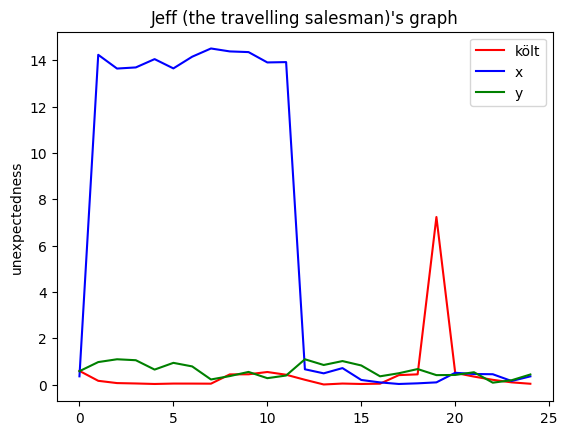

In [35]:
from processing import preprocess
import matplotlib.pyplot as plt
import numpy as np

res = preprocess(data_jeff(10), data_jeff(2))
data = []
setting = [["r", "költ"], ["b", "x"], ["g", "y"]]
for r in range(len(res)):
    for i in res[r][0]:
        data.append(i)
    label = list(range(len(res[r][0])))
    plt.plot(label, data, color=setting[r][0] ,label=setting[r][1])
    data = []
plt.legend()
plt.ylabel("unexpectedness")
plt.title("Jeff (the travelling salesman)'s graph")
plt.show()

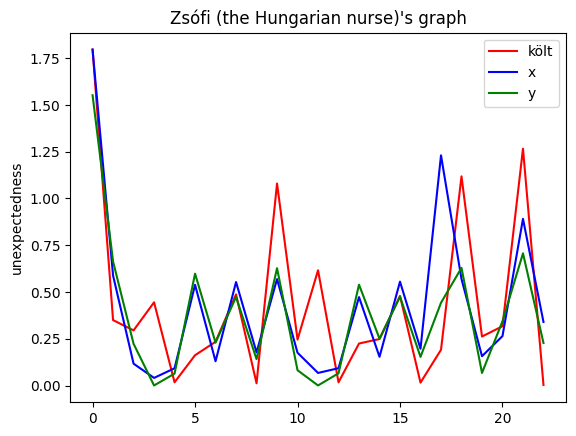

In [39]:
from processing import preprocess
import matplotlib.pyplot as plt
import numpy as np

res = preprocess(data_zsofi(10), data_zsofi(2))
data = []
setting = [["r", "költ"], ["b", "x"], ["g", "y"]]
for r in range(len(res)):
    for i in res[r][0]:
        data.append(i)
    label = list(range(len(res[r][0])))
    plt.plot(label, data, color=setting[r][0] ,label=setting[r][1])
    data = []
plt.legend()
plt.ylabel("unexpectedness")
plt.title("Zsófi (the Hungarian nurse)'s graph")
plt.show()

<p>The graphs represent well that Jeff's lifestyle is more unpredictable, but compared to the locations the amount of the spendings is more consistent. The importance of these 3 numbers can drastically change in terms of each person's lifestyle, all people have irregularities in their lives, but looking at the data relative to the person, we can easily find data that shows the same pattern. With our product, we can rely on these in fraud investigation</p>